## MNIST图像(卷积神经网络入门)

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

2023-01-17 08:46:59.572319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


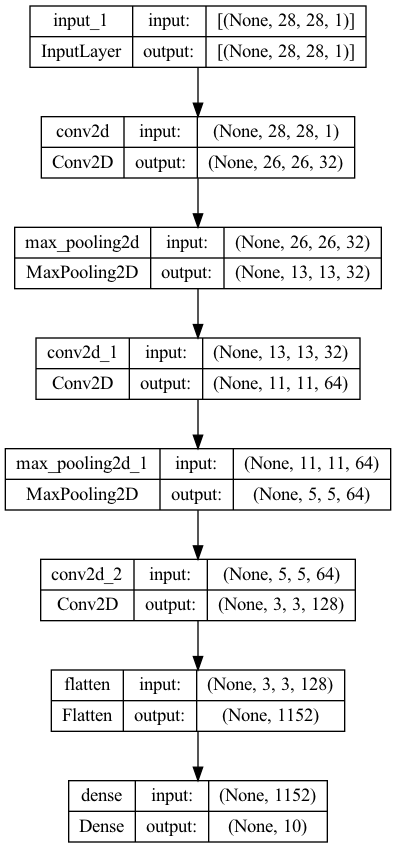

In [7]:
keras.utils.plot_model(model, "mini_cnn.png", show_shapes=True)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [9]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 19s 20ms/step - loss: 0.1585 - accuracy: 0.9506
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0438 - accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0292 - accuracy: 0.9912
Epoch 4/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0226 - accuracy: 0.9931
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0176 - accuracy: 0.9945


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0247 - accuracy: 0.9929
Test accuracy: 0.993


## TensorFlow Dataset 练习

In [23]:
import numpy as np
import tensorflow as tf 
randoms_numbers = np.random.normal(size=(1000, 16)) # 1000个样本，每个样本是大小为16的向量
dataset = tf.data.Dataset.from_tensor_slices(randoms_numbers)

In [26]:
# 数据集只会生成单个样本
for i, element in enumerate(dataset):
    print(element.shape)
    if i>=1:
        break

(16,)
(16,)


In [27]:
# 用.batch()方法来批量生成数据
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i>=1:
        break

(32, 16)
(32, 16)


In [28]:
# .map()方法 , 利用这一方法将数据集元素的形状由(16,)变为(4,4)
reshape_dataset = dataset.map(lambda x:tf.reshape(x, (4,4)))
for i, element in enumerate(reshape_dataset):
    print(element.shape)
    if i>=1:
        break

(4, 4)
(4, 4)


## dogs-vs-cats(在小型数据集上从头开始训练一个卷积神经网络)

#### 为猫狗分类问题实例化一个小型卷积神经网络
数据集地址<https://www.kaggle.com/competitions/dogs-vs-cats/data>

In [13]:
!unzip -qq train.zip

In [14]:
import os, shutil, pathlib

In [15]:
orginal_dir = pathlib.Path("train") # 原始数据集的解压目录
new_base_dir = pathlib.Path("cats_vs_dogs_small") # 保存较小数据集的目录

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir/subset_name/category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg"
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=orginal_dir/fname, dst=dir/fname)
            
make_subset("train", start_index=0, end_index=1000) # 用每个类别的前1000张图像创建训练子集
make_subset("validation", start_index=1000, end_index=1500) # 用每个类别接下来的500张图像创建验证子集
make_subset("test", start_index=1500, end_index=2500) # 用每个类别接下来的1000张图像创建测试子集

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
inputs = keras.Input(shape=(180, 180, 3)) # 模型输入180*180的RGB图像
x = layers.Rescaling(1./255)(inputs) # 将输入除以255， 将其缩放至【0,1】区间
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [21]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [29]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir/"train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir/"validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir/"test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [31]:
# 显示Dataset生成的数据和标签的形状
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [32]:
# 利用Dataset拟合模型
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "convnet_from_scratch.keras",
        save_best_only = True,
        monitor = "val_loss")
]

history = model.fit(
    train_dataset, 
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 58s 904ms/step - loss: 0.7331 - accuracy: 0.5130 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 58s 929ms/step - loss: 0.7328 - accuracy: 0.5645 - val_loss: 0.6247 - val_accuracy: 0.6490
Epoch 3/30
63/63 [==============================] - 63s 1s/step - loss: 0.6546 - accuracy: 0.6350 - val_loss: 0.6600 - val_accuracy: 0.5930
Epoch 4/30
63/63 [==============================] - 58s 923ms/step - loss: 0.6188 - accuracy: 0.6640 - val_loss: 0.5853 - val_accuracy: 0.6760
Epoch 5/30
63/63 [==============================] - 58s 923ms/step - loss: 0.5950 - accuracy: 0.6840 - val_loss: 0.5685 - val_accuracy: 0.6950
Epoch 6/30
63/63 [==============================] - 57s 907ms/step - loss: 0.5578 - accuracy: 0.7170 - val_loss: 0.5822 - val_accuracy: 0.6900
Epoch 7/30
63/63 [==============================] - 59s 944ms/step - loss: 0.5355 - accuracy: 0.7400 - val_loss: 0.5793 - val_accuracy: 0.7040
Ep

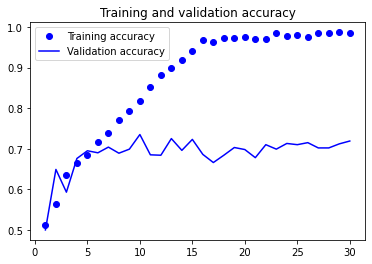

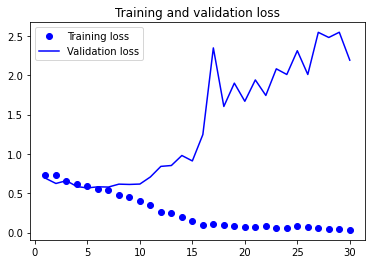

In [33]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [35]:
# 在测试集上评估模型
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy : {test_acc:.3f}")

63/63 [==============================] - 14s 211ms/step - loss: 0.5895 - accuracy: 0.6910
Test accuracy : 0.691


## 使用预训练模型

In [36]:
# 将VGG16卷积基实例化
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet", # 指定模型初始化的权重检查点
    include_top = False, # 指定是否包含密集连接分类器
    input_shape=(180, 180, 3)) #输入模型的图像张量的形状

58889256/58889256 [==============================] - 5s 0us/step


In [37]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

### 不使用数据增强的快速特征提取

In [39]:
# 提取VGG16的特征和对应的标签
import numpy as np
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 2s 2s/step


In [40]:
train_features.shape  #提取的特征形状为(samples, 5, 5, 512)

(2000, 5, 5, 512)

In [41]:
# 定义并训练密集连接分类器
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs) # 注意：将特征传入Dense层之前，需要先经过Flatten层
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_features, train_labels, 
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 3s 35ms/step - loss: 14.1079 - accuracy: 0.9175 - val_loss: 7.5142 - val_accuracy: 0.9560
Epoch 2/20
63/63 [==============================] - 2s 32ms/step - loss: 4.8108 - accuracy: 0.9670 - val_loss: 4.3215 - val_accuracy: 0.9770
Epoch 3/20
63/63 [==============================] - 1s 24ms/step - loss: 2.5286 - accuracy: 0.9880 - val_loss: 4.5753 - val_accuracy: 0.9730
Epoch 4/20
63/63 [==============================] - 1s 24ms/step - loss: 0.8078 - accuracy: 0.9915 - val_loss: 6.7152 - val_accuracy: 0.9690
Epoch 5/20
63/63 [==============================] - 2s 25ms/step - loss: 0.7026 - accuracy: 0.9935 - val_loss: 7.2421 - val_accuracy: 0.9670
Epoch 6/20
63/63 [==============================] - 2s 24ms/step - loss: 0.9039 - accuracy: 0.9920 - val_loss: 5.2650 - val_accuracy: 0.9750
Epoch 7/20
63/63 [==============================] - 2s 24ms/step - loss: 0.3476 - accuracy: 0.9965 - val_loss: 7.5114 - val_accuracy: 0.9700
Epoch 8/20
6

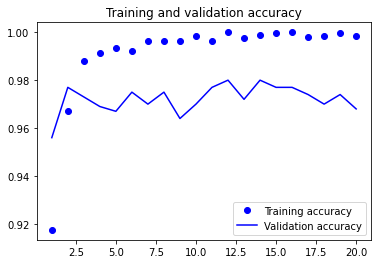

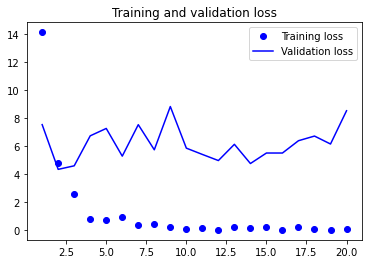

In [42]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### 使用数据增强的特征提取

In [43]:
# 将VGG16卷积基实例化并冻结
conv_base = keras.applications.vgg16.VGG16(
    weights = "imagenet",
    include_top = False)
conv_base.trainable = False # 将trainable设为False，这将清空该层或模型的可训练权重列表

In [45]:
# 打印冻结前后的可训练权重列表
conv_base.trainable = True
print("This is the number of trainable weights "
          "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [46]:
conv_base.trainable = False
print("This is the number of trainable weights "
          "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [47]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)  #使用数据增强
x = keras.applications.vgg16.preprocess_input(x)  #对输入值进行缩放
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [51]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
'''history = model.fit(  # 在GPU上运行
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks) 

test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
    '''

'history = model.fit(  # 在GPU上运行\n    train_dataset,\n    epochs=50,\n    validation_data=validation_dataset,\n    callbacks=callbacks) \n\ntest_model = keras.models.load_model(\n    "feature_extraction_with_data_augmentation.keras")\ntest_loss, test_acc = test_model.evaluate(test_dataset)\nprint(f"Test accuracy: {test_acc:.3f}")\n    '

### 微调预训练模型

In [52]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [53]:
# 冻结除最后4层外的所有层
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [57]:
# 微调模型
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
'''history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")'''

'history = model.fit(\n    train_dataset,\n    epochs=30,\n    validation_data=validation_dataset,\n    callbacks=callbacks)\n\nmodel = keras.models.load_model("fine_tuning.keras")\ntest_loss, test_acc = model.evaluate(test_dataset)\nprint(f"Test accuracy: {test_acc:.3f}")'

OSError: No file or directory found at fine_tuning.keras